# Questions

**1. Please explain something that you believe to be true that most of your peers don’t.**

All industries will rely on blockchain technology within the next 10 years. 

Societies will depend on decentralised applications (dApps), smart contracts will govern business operations, and decentralised data storage will improve sector efficiency. Electoral voting, authentication of physical items (e.g., luxury handbag, trading cards, and football game tickets), and ownership of assets (e.g., property) will be stored on blockchains. While unsustainable energy use predominantly powers the blockchain, the continual improvement of more sustainable resources will advance the adoption of this technology.

Our world has scarce resources that are depleting, and blockchain can help. I believe it will reduce supply chain problems by mitigating the over production of unnecessary products that end up in landfill, improve healthcare systems by allowing better storage of patient data to speed up the diagnosis process, and, expand how social capital is transferred through decentralised finance. 

Total factor productivity, represented by the Cobb-Douglas production function, is the growth in total output of a firm, industry, or economy through the dependence upon inputs such as labour and capital. To shift the curve on what we call the production possibility frontier (PPF), technological advancement is required. This shift increases total factor productivity and can return higher economic growth with the same, if not less, resources. Blockchain technology is the next technological advancement to cause many of these PPF shifts.

**2. If you had to invest 10 million and live off the income for the next 50 years, would you rather choose a stake in a company that owns steel mills or Nike?**

Nike was formed in 1964 and is part of the global consumer apparel industry that has a total annual value of \\$1.5 trillion USD. Nike has paid dividends since 1985, with an average increase of 15.8\% per year, with the current quarterly dividend at \\$0.305 per share. While there are strong competitors (e.g., Adidas, Under Armour, Lululemon Athletica), Nike is the market leader in the "Apparel Accessories Sports equipment" industry. Their association with sports, streetwear, sneakerheads with their "Jordan" range, along with collaborations with luxury brands, is paramount to their global success.  

Nike is the footwear market leader in China, with the popularity of the NBA in the country acting as the catalyst. Basketball's popularity should disproportionately benefit Nike over other brands. However, the coronavirus impact on China's (and world) economy and the NBA season suspension demonstrates how susceptible Nike is to both demand and supply side shocks. With the expanding metaverse, Nike's recent acquisition of RTFKT (i.e., virtual sneaker designer) can accelerate their digital transformation into this area. However, the revenue opportunities that they can obtain are conditioned on the growth of this market and their ability to capture it, both current speculative factors. 

The steel industry is active in all parts of the world, transforming iron ore into a range of products that are sold for a total annual value of \\$2.5 trillion USD. In terms of a company that owns steel mills, I am assuming that ANY company can be purchased, the company purchased operates in multiple continents, and pays dividends. Steel has been around since the 18th century. Are their currently replacements for steel, and will there be any in the next 50 years? Not likely. 

The continued push towards the utilisation of more renewable resources poses a threat. Consequently, it is important this company uses technologies, methods, and or production of materials that continually minimise their global footprint (e.g., production of carbon neutral steel products – hydrogen steelmaking). Furthermore, the acquisition of different companies or expansion into different commodities would be likely over a 50-year period. Steel is a key input into many industrial sectors that produce goods essential to the world economy, for example, trains, ships, cars, buildings, and bridges. Moreover, steel is largely correlated to GDP growth and population growth. 

The steel industry does exhibit some volatility; however, this predominantly comes from competition between developing nations. In the long-term, Nike is volatile. This is due to firm demand dependent on factors including the success of their marketing team to advertise their products, CEO/senior management capturing market trends, while also out innovating their industry competitors. 

Houses, cars, trains etc. will still need building.

Therefore, if I had to invest 10 million and live off the income for the next 50 years, **I would choose a company that owns steel mills.**


# Data Exercise 

In [1]:
import os 
import numpy as np
import pandas as pd

from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy import stats

from pandas.tseries.offsets import MonthEnd
from matplotlib import pyplot as plt    
from IPython.display import Markdown as md
from IPython.display import display

import seaborn as sns; sns.set_theme()

# Executive Summary

Brief overview of responses to questions. 

**1. Which stock performed the best and which stock performed the worst over the last 5 years?** <br>
StockId 206469 is the best performing stock, while StockId 100376 is the worst performing.

**2. a) Over the last 3 years which 10 stocks were the most correlated to stock ID 210449 and which 10 were most correlated to stock ID 96775 over the 3 years ending on 1 March 2017?** <br>

10 most positively correlated to 210449 include 44446, 79454, 88165, 115502, 134839, 140055, 161247, 169364, 213639, 234667.

10 most positively correlated to 96775 include 18436, 19472, 75624, 142557, 152213, 185736, 187442, 192320, 208218, 225894. 

**2. b) Does one of the groups of 10 stocks from question 2a seem more homogeneous than the other? Explain how you reach your answer.** <br>

Based on the correlation of returns, standard deviation of within-group correlations, along with the hierarhical dendrogram, it appears that group1 (i.e., StockId 210449 group) is more homogeneous.

**3. How would you pick 10 stocks in which to invest £1000 of your own money given the constraints below? <br>
i. Using only the data provided in the CSV file** <br>

Due to the restrictions to returns data, any investment portfolio strategy I propose would be based upon the distributional characteristics of the time-series of stock returns.  Therefore, I would explore risk factor strategies based on price data such as momentum (Jegadeesh and Titman, 1993), or more advanced econometrics methods (i.e., ARMA, GARCH, Variance-Covariance Matrix) or AI/ML approaches (i.e., LTSM, GAN) for time-series forecasting.  Based on the academic literature in applied financial economics, research work with my PhD supervisor [Assoc Prof. Rand Low](https://researchers.uq.edu.au/researcher/9214), and my own analysis of the dataset provided, I would chose the risk-parity strategy proposed by Kirby and Ostdiek (2012) which is volatility timing with a 6-month rolling sample window.

**ii. If you had any data you wanted** <br>

I would generate a portfolio based on risk factor exposure such as quality, momentum, and sentiment and use the concept of volatility timing. The Fama French 5 factors can be regressed against the portfolio returns to identify whether the strategy generates significant alpha.

**Read in data and format data**

In [2]:
os.chdir('') #input directory where file is 

df = pd.read_csv('OrbisQuantDataExercise.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop_duplicates(subset=['StockId', 'Date']) #ensure no duplicate StockId by date
df = pd.pivot_table(df, values='Value', index='Date', columns='StockId') #create pivot table of returns
df = df.dropna(axis=1) #drop columns (StockId) that do not have data over entire period
df.iloc[np.r_[0:4, -4:0]] #print head and tail of data

StockId,147,607,2582,11646,11922,13500,14016,15372,18436,18510,...,228732,228920,229759,230414,230632,231390,231591,231994,233782,234667
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,0.049552,0.046233,0.015355,0.041570,0.072486,-0.013511,0.017805,-0.042347,0.031387,0.031842,...,-0.001851,0.016301,0.015766,0.050301,-0.002518,-0.007864,-0.003514,-0.001115,0.079818,0.047548
2013-01-11,0.021211,0.031106,0.026911,0.019801,0.043497,0.039983,-0.004021,-0.008935,0.028671,-0.018875,...,0.022146,0.043954,-0.038321,0.076157,0.039237,0.023642,0.020151,-0.062082,-0.031611,-0.012766
2013-01-18,0.013127,0.002562,0.013093,-0.007946,0.000835,-0.042209,-0.013621,-0.028948,-0.013512,0.025137,...,-0.013313,0.051671,0.015598,-0.062606,0.002649,-0.012946,-0.013840,0.034435,0.017637,0.005748
2013-01-25,-0.040021,0.013796,-0.021588,-0.029596,0.087987,-0.001748,-0.050079,0.020529,0.033410,0.044327,...,0.071373,0.017350,0.011360,0.031988,0.085116,-0.009759,0.048255,-0.013274,0.028477,0.016429
2018-08-24,0.017413,0.009188,0.047506,-0.002846,0.066530,0.003221,-0.032477,0.020275,0.011119,-0.088539,...,-0.010637,0.176520,0.036102,0.051704,-0.023919,-0.078425,0.068520,-0.015559,0.035476,0.014155
2018-08-31,0.011184,0.029080,-0.101714,0.025513,0.031739,-0.005893,-0.002225,-0.006094,-0.004384,0.031938,...,0.041123,-0.074724,0.007725,0.155388,0.005453,-0.093816,0.019694,0.017294,0.007818,0.011373
2018-09-07,-0.014276,-0.046349,0.062932,-0.024114,-0.022156,-0.125435,-0.016454,-0.000393,-0.020526,0.052958,...,-0.023113,0.052355,-0.008272,-0.039239,-0.029150,-0.043404,-0.166495,0.006405,-0.021903,-0.022745
2018-09-14,0.023434,0.023876,0.136381,0.013482,0.007165,0.044999,0.048171,0.079293,-0.016496,-0.011668,...,0.000567,0.065446,0.034434,0.002849,0.018414,-0.083584,0.065612,0.074761,0.060416,-0.019874


# Question 1

**Which stock performed the best and which stock performed the worst over the last 5 years?**<br>
Interested in data only over the last 5 years (i.e., 14 September 2018 to 14 September 2013)

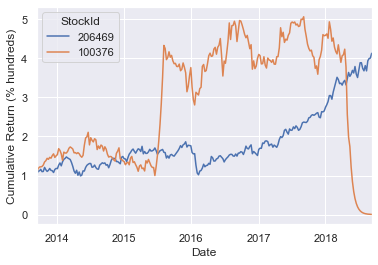

In [3]:
df_1 = df.copy() #copy of original data
df_1 = df_1[df_1.index>='2013-09-13'] #ensure data covers the 5 year period
df_1 = (1+df_1).cumprod() #cumulative returns
best = np.argmax(df_1.iloc[-1]) #column index of best performing StockId
worst = np.argmin(df_1.iloc[-1]) #column index of worst StockId
best = df_1.iloc[:,best].name #best performing StockId 
worst = df_1.iloc[:,worst].name #worst performing StockId
df_1_plot = df_1[[best, worst]] #data to plot

best_perc = round(df_1_plot[best].iloc[-1]*100, 2) #best performing stock cumulative return
worst_perc = round(df_1_plot[worst].iloc[-1]*100, 2) #worst performing stock cumulative return

"""Plot cumulative returns of the best and worst performing stocks"""
df_1_plot.plot()
plt.xlabel("Date")
plt.ylabel("Cumulative Return (% hundreds)")
plt.show()

In [4]:
md("""**StockId 206469 is the best performing** stock returning {}%, while **StockId 100376 is the worst performing** returning {}% over the 5 year period. 100376 was outperforming 206469 until mid to late 2018, until, what appears, that 100376 entered default. Without knowing the firm/industry, it is difficult to elaborate further on the causes of the sudden fall.""".format(str(best_perc),str(worst_perc)))


**StockId 206469 is the best performing** stock returning 412.91%, while **StockId 100376 is the worst performing** returning 0.37% over the 5 year period. 100376 was outperforming 206469 until mid to late 2018, until, what appears, that 100376 entered default. Without knowing the firm/industry, it is difficult to elaborate further on the causes of the sudden fall.

# Question 2

**a) Over the last 3 years which 10 stocks were the most correlated to stock ID 210449 and which 10 were most correlated to stock ID 96775 over the 3 years ending on 1 March 2017?**

In [5]:
#Function to plot top 10 positive and negative correlated stocks with inputted df, StockId and date range

def correlated_stocks(df, stock_of_interest, date):
    """
    Correlation heatmap of 10 most positively and negatively correlated with stock of interest
    
    df: input df with columns as StockId, rows as returns, and index as Date
    stock_of_interest (int): StockId to find 10 most correlated stocks
    date (str in list): 1 date if looking for 1 period, 2 dates (i.e., begin than end) in list if looking over range
    """
    if len(date) == 1:
        df_corr = df[df.index >=date[0]] #time period (i.e., 14 September 2018 to 14 September 2015) in example used
    elif len(date) == 2:
        df_corr = df[(df.index >=date[0]) & (df.index <=date[1])] #time period (i.e., 1 March 2017 to 1 March 2014) in example used
        
    #10 most correlated stocks
    corr_matrix = df_corr.corr() #correlation matrix of returns 
    stock_corr = corr_matrix[stock_of_interest].sort_values(ascending=False)[1:] #correlation of stock_of_interest with other stocks, ignoring correlation with itself

    #Assuming "most" means positive, these are the 10 most positively correlated stocks with stock_of_interest
    most_pos = [stock_of_interest] + list(stock_corr[0:10].index)
    pos_df = df_corr[df_corr.columns.intersection(most_pos)]

    #If "most" refers to negative, these are the 10 most negatively correlated stocks with stock_of_interest 
    most_neg = [stock_of_interest] + list(stock_corr[-10:].sort_values().index)
    neg_df = df_corr[df_corr.columns.intersection(most_neg)]
    
    #plot heatmap of 10 most positive and negative StockId's with stock_of_interest
    mask = np.zeros_like(pos_df.corr()) #array of zeros the size of pos_df
    mask[np.triu_indices_from(mask)] = True #ensures the upper non-diagonal values are white in the subplots
    with sns.axes_style("white"):
        f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))
        ax1.set_title("10 most positively correlated with {}".format(str(stock_of_interest)), fontweight="bold", size=18)
        sns.heatmap(pos_df.corr(), mask=mask, annot=True, fmt=".2", linewidths=.1, ax=ax1, square=True)
        ax2.set_title("10 most negatively correlated with {}".format(str(stock_of_interest)), fontweight="bold", size=18)
        sns.heatmap(neg_df.corr(), mask=mask, annot=True, fmt=".2", linewidths=.1,ax=ax2, square=True)    

    return pos_df
        

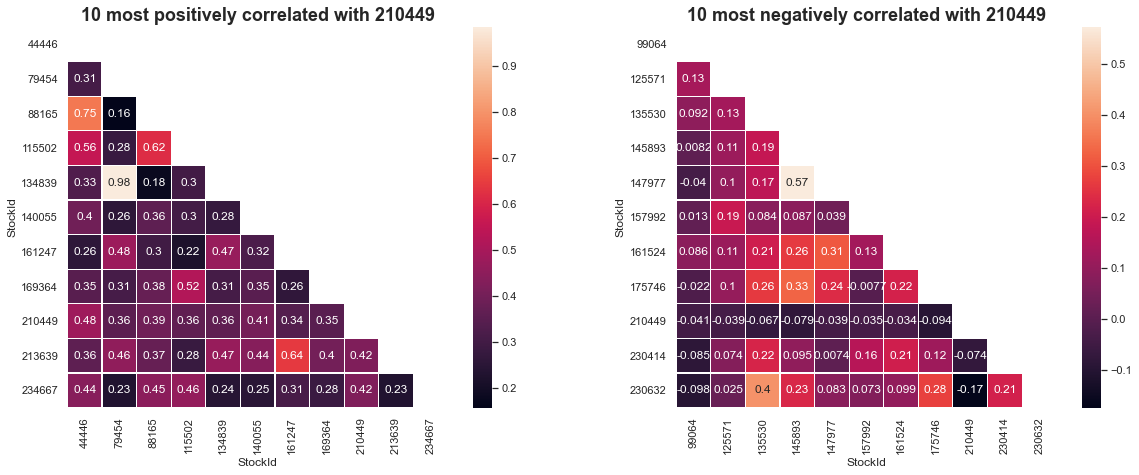

In [6]:
#10 stocks most correlated to StockId 210449 in last 3 years (i.e., 14 September 2018 to 14 September 2015)
pos_210449 = correlated_stocks(df, 210449, ['2015-09-14'])


The above plot demonstrates the 10 most positively and negatively correlated stocks with StockId 210449 over the period 14 September 2018 to 14 September 2015. 44446 is most positively correlated at 0.48, followed by 213639 and 234667 at 0.42. In terms of most negatively correlated, 230632 exhibits a correlation of -0.17, along with 175746 at -0.09.

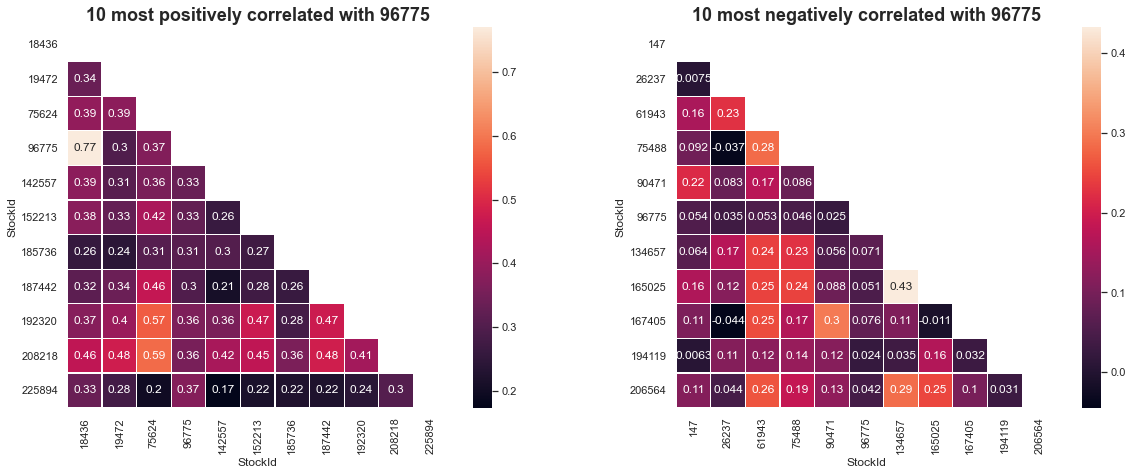

In [7]:
#10 stocks most correlated to StockId 210449 over the 3 years ending on 1 March 2017 (i.e., 1 March 2017 to 1 March 2014)
pos_96775 = correlated_stocks(df, 96775, ['2014-03-1', '2017-03-1'])


The above plot demonstrates the 10 most positively and negatively correlated stocks with StockId 96775 over the period 1 March 2017 to 1 March 2014. 18436 is most positively correlated at 0.77, followed by 75624 and 225894 at 0.37. In terms of most negatively correlated, 194119 exhibits a correlation of 0.024, along with 90471 at 0.025.

**b) Does one of the groups of 10 stocks from question 2a seem more homogeneous than the other? Explain how you reach your answer.**

In [8]:
#Function to plot hierarchical dendrogram of the two groups 
def hier_dend(group1, group2, stock1='210449', stock2='96775'): 
    """
    Plot hierarchical dendogram to inspect clustering
    
    group1: input df with columns as StockId, rows as returns, and index as Date
    group2: input df with columns as StockId, rows as returns, and index as Date
    stock1 (str): StockId #1 interested in
    stock2 (str): StockId #2 interested in
    """
    c_link_dict = {} #empty dict to add data 
    for idx, group in enumerate([group1,group2]):
        corr = spearmanr(group).correlation # distance matrix - spearman correlation
        corr_linkage = hierarchy.ward(corr) # linkage matrix - ward
        c_link_dict[idx] = corr_linkage #add to dictionary
        
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10)) #subplots next to each other to plot
    ax1.set_title(("StockId {} group".format(stock1)), fontweight="bold", size=18)
    ax1.set_xlabel('StockId')
    ax1.set_ylabel('Distance')
    dendro = hierarchy.dendrogram(c_link_dict[0], labels=group1.columns.tolist(), ax=ax1)
    ax2.set_title(("StockId {} group".format(stock2)), fontweight="bold", size=18)
    ax2.set_xlabel('StockId')
    ax2.set_ylabel('Distance')
    dendro = hierarchy.dendrogram(c_link_dict[1], labels=group2.columns.tolist(), ax=ax2)

In [9]:
#Display correlation of group 1 and group2, along with standard deviation of within-group correlations
corr_210449 = pos_210449.corr()[210449].sort_values(ascending=False)
corr_96775 = pos_96775.corr()[96775].sort_values(ascending=False)

corr_210449 = corr_210449.append(pd.Series(corr_210449.std(), index=['Std_corr']))
corr_96775 = corr_96775.append(pd.Series(corr_96775.std(), index=['Std_corr']))

display(corr_210449)
display(corr_96775)

210449      1.000000
44446       0.483191
213639      0.423877
234667      0.423187
140055      0.406416
88165       0.394513
115502      0.362818
134839      0.361497
79454       0.355530
169364      0.350836
161247      0.340650
Std_corr    0.188660
dtype: float64

96775       1.000000
18436       0.770767
225894      0.372563
75624       0.371610
192320      0.363940
208218      0.357218
142557      0.333127
152213      0.326166
185736      0.309194
187442      0.299221
19472       0.297694
Std_corr    0.229411
dtype: float64

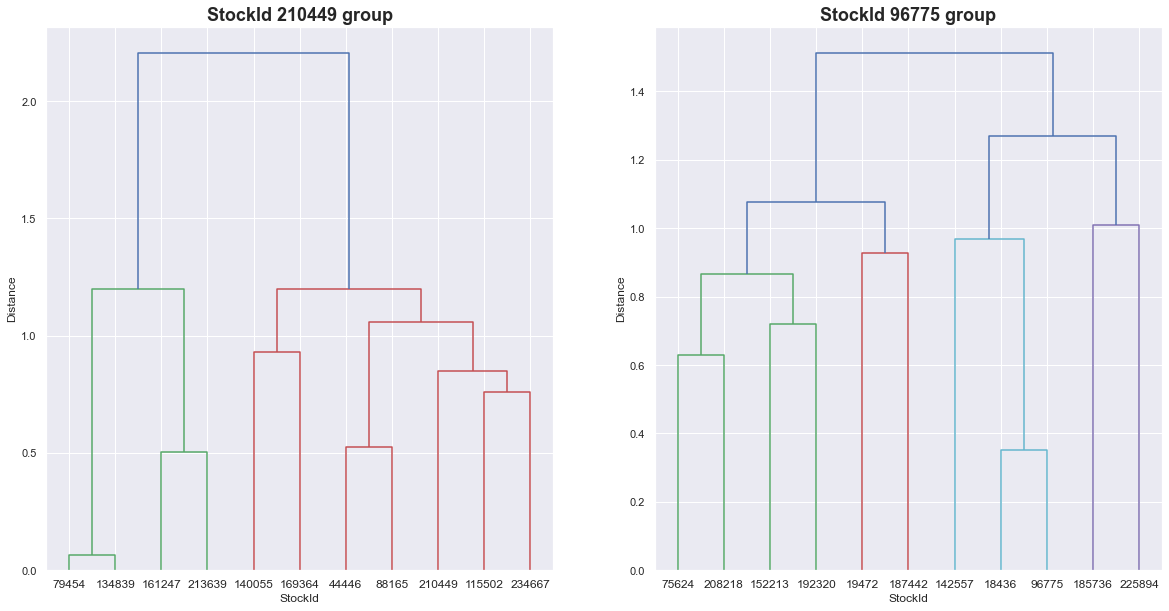

In [10]:
#plot hierarchical dendrograms
hier_dend(pos_210449, pos_96775)

Based on the correlation of returns, standard deviation of within-group correlations, along with the hierarhical dendrogram, it appears that group1 (i.e., StockId 210449 group) is more homogeneous. In group2, StockId 96775 is highly correlated with 18436 at 0.77, with the remaining nine stocks in the group within the range of 0.37 and 0.29. This corresponds with a standard deviation of return correlations of 0.23. In comparison, group1 correlation of returns ranges between 0.48 and 0.34, while standard deviation of return correlations is 0.19.

Looking at the hierarchical dendrograms, with spearman correlation utilised as the distance measure and ward as the linkage, StockId 210449 group appears to have two distinct clusters, while StockId 96775 group has four clusters (i.e., cutting across the dark blue line). With the StockId 210449 group clustering closer together, combined with the aforementioned information, this group appears to be more homogeneous. 

# Question 3
**How would you pick 10 stocks in which to invest £1000 of your own money given the constraints below? <br>
i. Using only the data provided in the CSV file** <br>

Being restricted to only returns data, the choice of strategy that can be used is either return characteristics or data generating process based. 

Depending upon an investors utility function, factor strategies such as low volatility (e.g., rolling standard deviation of returns - see, Li, Sullivan, and Garcia-Feijóo (2016)) or momentum (e.g., t-12 to t-1, where t=month - see, Jegadeesh and Titman (1993) or Asness, Moskowitz, and Pedersen (2013)) could be utilised and these factors could be implemented long only or long/short. 

DeMiguel, Garlappi and Uppal (2009) find that of the various optimising models in the literature (e.g., mean-variance), there is no single model that consistently delivers a Sharpe ratio or cumulative return that is higher than that of the naive (1/N) portfolio. 

Kirby and Ostdiek (2012) propose several strategies that mimic some of the attractive features of 1/N while they take into account the information contained in past asset returns. They show that these “market timing” strategies outperform 1/N out-of-sample, no matter the presence of transaction costs. These strategies are often referred to as risk parity, where the risk measure can include, for example, volatility, negative skewness, or beta. Volatility timing, that is where volatility is used as the risk measure, has shown promising results within the literature (Kirby and Ostdiek, 2012; Rad et al., 2020).

Given the data constraints, and before transaction costs, I will demonstrate 1/N, mean-variance, minimum-variance, and volatility timing strategies to estimate monthly portfolio weights in-sample and out-of-sample, and, report annualised sharpe ratios for each strategy across various rolling windows.

At each month, the companies with the 10 highest weighting in each strategy, will be held with equal-weighting.

# Convert Weekly Returns to Monthly

In [11]:
returns = df.copy() #copy of original data
returns = returns.resample("M").sum() #resample weekly returns to monthly returns

# Portfolio Strategies

# Equal Weighted


In [12]:
"""
The naive (“ew” or “1/N”) strategy that we consider involves holding a portfolio weight 1/N in each of the N 
risky assets. This strategy does not involve any optimisation or estimation and completely ignores the data.
"""

def ew(rets, n):
    weights = [1/n] * n
    return weights

# Mean-Variance

In [13]:
"""
 Does not require the estimation of the mean, therefore less sensitive to estimation risk.

1. Covariance is a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction
2. Variance is a measure of the variability or spread in a set of data
3. Variance and covariance are often displayed together in a variance-covariance matrix, (aka, a covariance matrix).
4. The variances appear along the diagonal and covariances appear in the off-diagonal elements
"""

def get_mv_weights(row):
    N = row.shape[0]
    date = row.name
    cov = cov_rolling.loc[date].values
    mean = row.values
    inv_cov =  np.linalg.pinv(cov) #inverse of a matrix

    # Weight to DataFrame when combined with .apply
    strat_weights.loc[date] = (inv_cov @ mean) / (([1] * N) @ inv_cov @ mean)

# Minimum-Variance

In [14]:
"""
Does not require the estimation of the mean, therefore less sensitive to estimation risk.
"""

def get_min_weights(row):
    N = row.shape[0]
    date = row.name
    cov = cov_rolling.loc[date].values
    mean = [1] * N
    inv_cov =  np.linalg.pinv(cov)

    # Weight to DataFrame when combined with .apply
    strat_weights.loc[date] = (inv_cov @ mean) / (([1] * N) @ inv_cov @ mean)

# Volatility Timing (VT) 

In [15]:
"""
VT does not require optimisation, they do not require covariance matrix inversion, they do not generate 
negative weights, and they allow the sensitivity of the weights to volatility changes to be adjusted via 
a tuning parameter.
"""

def get_vt_weights(row):
    date = row.name
    cov = cov_rolling.loc[date].values
    weight = 1 / np.diag(cov)
    weight /= weight.sum()

    # Weight to DataFrame when combined with .apply
    strat_weights.loc[date] = weight
    

# Sharpe Ratio (Annualised)

In [16]:
def sharpe_ratio(returns):
    sharpe_ratio = returns.mean() / returns.std()
    return sharpe_ratio * np.sqrt(12)

# Apply Strategies (Rolling Window, Rebalanced Monthly) 
Approx 5-10 mins to run 


In [17]:
ts_rets = returns.unstack().reset_index().rename(columns={0:'Ret'}) #unstack returns df 
num_stocks=len(returns.columns) #length of columns of returns df = number of stocks

port_rets = {}
port_weights = {}
port_sharpe = pd.DataFrame()

roll=[6,12,18,24] #rolling month periods to iterate over

for roll_period in roll:
    #A DataFrame to keep track of each strategy's returns (each column will correspond to a different strategy)
    portfolio_rets = {}
    portfolio_weights = {}

    #EW strategy
    ew_weights = ew(returns, num_stocks)
    portfolio_rets = returns[roll_period:].mul(ew_weights, axis=1).sum(axis=1).to_frame("EW")
    portfolio_weights["EW All Stocks"] = ew_weights
    print('EW portfolios {} formed'.format(str(roll_period)+'mth_roll'))

    #Mean-Var, Min-Var, VT strategies
    strat_dict = {'Mean-Var':get_mv_weights,'Min-Var':get_min_weights, 'VT':get_vt_weights}

    for strat, strat_func in strat_dict.items():
        #Get sample expected returns and sample covariance
        mean_rolling = returns.rolling(roll_period).mean().dropna()
        cov_rolling = returns.rolling(roll_period).cov().dropna()

        #DataFrame for weights to be appended
        strat_weights = pd.DataFrame(columns=returns.columns)

        #Apply strategy weighting 
        mean_rolling.apply(strat_func, axis=1)
        
        #Unstack df, retrieve top 10 weighted stocks for each period, calculate port rets with these 10 stocks for each period
        period_weights = strat_weights.unstack().reset_index().rename(columns={'level_1':'Date',0:'Weight'}) 
        period_weights = period_weights.set_index('StockId').groupby('Date')['Weight'].nlargest(10).reset_index()
        period_weights['Weight'] = 1/10
        period_weights = period_weights.merge(ts_rets, how='left', on=['Date', 'StockId'])
        weights = pd.pivot_table(period_weights,values='Weight', index='Date', columns='StockId').fillna(0)
        rets = pd.pivot_table(period_weights,values='Ret', index='Date', columns='StockId').fillna(0)

        #Apply in-sample (weights at time t are multipled and summed with returns at time t, the resulting series is appended to portfolio_rets)
        portfolio_rets["{} (IS) All Stocks".format(strat)] = returns[roll_period:].mul(strat_weights, axis=1).sum(axis=1)
        portfolio_rets["{} (IS) 10 Stocks".format(strat)] = rets[roll_period:].mul(weights, axis=1).sum(axis=1)
        portfolio_weights["{} (IS) All Stocks".format(strat)] = strat_weights
        portfolio_weights["{} (IS) 10 Stocks".format(strat)] = weights

        #Apply out-of-sample (shift index by 1, weights at time t are calculated by the sample at time t-1)
        strat_weights.index += MonthEnd(1)
        weights.index += MonthEnd(1)
        strat_weights = strat_weights[:-1]
        weights = weights[:-1]

        portfolio_rets["{} (OOS) All Stocks".format(strat)] = returns[roll_period:].mul(strat_weights, axis=1).sum(axis=1)
        portfolio_rets["{} (OOS) 10 Stocks".format(strat)] = rets[roll_period:].mul(weights, axis=1).sum(axis=1)
        portfolio_weights["{} (OOS) All Stocks".format(strat)] = strat_weights
        portfolio_weights["{} (OOS) 10 Stocks".format(strat)] = weights
        
        print(strat + ' portfolios {} formed'.format(str(roll_period)+'mth_roll'))

    #Append to DataFrame and Dictionaries outside of loop
    port_sharpe[str(roll_period)+"mth_roll"] = portfolio_rets.apply(sharpe_ratio, axis=0)
    port_rets[str(roll_period)+"mth_roll"] = portfolio_rets
    port_weights[str(roll_period)+"mth_roll"] = portfolio_weights
    
    print(str(roll_period)+'mth_roll iteration complete')


EW portfolios 6mth_roll formed
Mean-Var portfolios 6mth_roll formed
Min-Var portfolios 6mth_roll formed
VT portfolios 6mth_roll formed
6mth_roll iteration complete
EW portfolios 12mth_roll formed
Mean-Var portfolios 12mth_roll formed
Min-Var portfolios 12mth_roll formed
VT portfolios 12mth_roll formed
12mth_roll iteration complete
EW portfolios 18mth_roll formed
Mean-Var portfolios 18mth_roll formed
Min-Var portfolios 18mth_roll formed
VT portfolios 18mth_roll formed
18mth_roll iteration complete
EW portfolios 24mth_roll formed
Mean-Var portfolios 24mth_roll formed
Min-Var portfolios 24mth_roll formed
VT portfolios 24mth_roll formed
24mth_roll iteration complete


# Results and Recommendation

In [18]:
port_sharpe

,6mth_roll,12mth_roll,18mth_roll,24mth_roll
EW,0.260446,0.076471,-0.103919,-0.070017
Mean-Var (IS) All Stocks,0.470058,-0.252755,-0.662858,0.664661
Mean-Var (IS) 10 Stocks,-0.032731,-0.243156,0.071804,0.905489
Mean-Var (OOS) All Stocks,0.323622,-0.363480,-0.641938,0.903186
Mean-Var (OOS) 10 Stocks,-0.606544,-0.621186,-0.157448,0.158523
Min-Var (IS) All Stocks,-0.262112,-0.360584,-0.261098,0.019082
Min-Var (IS) 10 Stocks,-0.340511,-0.908892,-1.047457,-0.371610
Min-Var (OOS) All Stocks,0.433636,0.051692,0.156117,-0.223834
Min-Var (OOS) 10 Stocks,-0.018797,-0.578444,-0.869756,-0.231314
VT (IS) All Stocks,0.688572,0.419359,0.273052,0.266192


Given the limited time period of data, rolling windows of 6, 12, 18, and 24 months were utilised. The above reports in-sample and out-of-sample annualised sharpe ratios for the EW, Mean-Var, Min-Var, and VT strategies. The performance with all and the 10 selected stocks is displayed. Across the various roll periods, VT appears to perform consistenly well. Consequently, the VT strategy Kirby and Ostdiek (2012) propose is the recommended portfolio weighting to be used to choose the 10 stocks. This strategy will hold the 10 least volatile stocks in each period. I understand this strategy would exhibit transaction costs, however the literature has shown this is negligible. Furthermore, due to time period restrictions in the data, this could be explored further with additional time-series returns data.

In [19]:
port_rets['6mth_roll'].head(10)

,EW,Mean-Var (IS) All Stocks,Mean-Var (IS) 10 Stocks,Mean-Var (OOS) All Stocks,Mean-Var (OOS) 10 Stocks,Min-Var (IS) All Stocks,Min-Var (IS) 10 Stocks,Min-Var (OOS) All Stocks,Min-Var (OOS) 10 Stocks,VT (IS) All Stocks,VT (IS) 10 Stocks,VT (OOS) All Stocks,VT (OOS) 10 Stocks
Date,,,,,,,,,,,,,
2013-07-31,0.045747,0.042373,0.000000,0.089593,0.000000,0.096635,0.000000,0.051019,0.000000,0.038101,0.000000,0.044070,0.000000
2013-08-31,-0.034836,0.002944,0.000000,-0.106472,0.000000,-0.039663,0.000000,-0.048703,0.000000,-0.010407,0.000000,-0.024373,0.000000
2013-09-30,0.082136,0.133844,0.000000,0.203337,0.000000,0.090698,0.000000,0.074070,0.000000,0.051157,0.000000,0.062102,0.000000
2013-10-31,0.043671,-0.054914,0.000000,0.105260,0.000000,0.039625,0.000000,0.049148,0.000000,0.034140,0.000000,0.036466,0.000000
2013-11-30,0.006142,0.033004,0.000000,-0.008426,0.000000,0.045962,0.000000,0.001406,0.000000,0.017500,0.000000,0.015442,0.000000
2013-12-31,-0.011681,0.047957,0.026385,0.063172,0.021929,-0.056473,-0.075059,-0.013767,-0.046536,0.010518,0.015068,-0.000353,0.004926
2014-01-31,-0.030331,-0.458255,-0.079413,0.083681,0.000000,-0.130124,-0.157489,0.013325,0.000000,-0.008675,0.005958,-0.020949,-0.006178
2014-02-28,0.052992,0.134298,0.152922,0.100472,0.000000,0.086442,0.158980,0.047342,0.023937,0.037019,0.012853,0.052476,0.010620
2014-03-31,0.009151,-0.150817,-0.116522,-0.014684,-0.022117,-0.029752,-0.012376,0.024800,0.004493,0.006899,0.006737,-0.000460,0.001216


In [20]:
port_weights['6mth_roll']['VT (OOS) 10 Stocks'].head(10)

StockId,147,607,11646,11922,13500,14016,15372,18436,19472,23262,...,213639,225894,227498,228732,230632,231390,231591,231994,233782,234667
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
2013-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
2013-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
2013-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
2013-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
2014-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


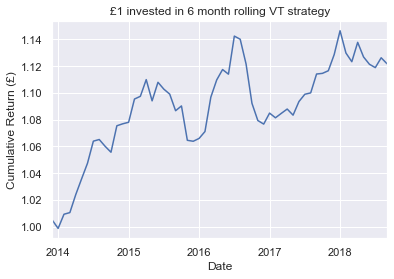

In [21]:
cumulative_rets = port_rets["6mth_roll"]["VT (OOS) 10 Stocks"]
cumulative_rets = cumulative_rets[cumulative_rets.index>="2013-12-31"] #ensure starts once portfolio formed with 24months rolling
cumulative_rets = (1+cumulative_rets).cumprod() #cumulative returns
cumulative_rets.plot()
plt.xlabel("Date")
plt.ylabel("Cumulative Return (£)")
plt.title("£1 invested in 6 month rolling VT strategy")
plt.show()


The above demonstrates portfolio returns (i.e., all and 10 stock), portfolio weights, and cumulative return of £1 invested in a 6 month rolling OOS VT strategy with 10 stocks and monthly rebalancing.

# Question 3

**How would you pick 10 stocks in which to invest £1000 of your own money given the constraints below? <br>
ii. If you had any data you wanted**

If any data was available, factor or multi-factor strategies could be employed. Traditional risk factors within the 
literature include quality (Asness, Frazzini, and Pedersen, 2019), low volatility (Asness, Frazzini, and Pedersen, 2012), momentum (Jegadeesh and Titman, 1993), size (Banz, 1981), and value (Fama and French, 1992). While there are many other risk factors, these dominate the literature and are often implemented as single factor strategies. The combination of these into multi-factors could include:

1. Quality and momentum;
2. Value, size, and momentum; and 
3. Low volatility and size

Additional risk factors that use non-financial time-series, such as ESG or sentiment analysis, can be used. 

In terms of selecting stocks, I would generate a portfolio based on risk factor exposure such as quality, momentum, and sentiment and use the concept of volatility timing. The Fama French 5 factors can be regressed against the portfolio returns to identify whether the strategy generates significant alpha.

In terms of new literaure, a paper titled [A Multifactor Perspective on Volatility-Managed Portfolios](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3982504) could be explored to implement strategies.


# References

Asness, C. S., Frazzini, A., & Pedersen, L. H. (2012). Leverage aversion and risk parity. *Financial Analysts Journal*, 68(1), 47-59.

Asness, C. S., Moskowitz, T. J., & Pedersen, L. H. (2013). Value and momentum everywhere. *Journal of Finance*, 68(3), 929-985.

Asness, C. S., Frazzini, A., & Pedersen, L. H. (2019). Quality minus junk. *Review of Accounting Studies*, 24(1), 34-112.

Banz, R. W. (1981). The relationship between return and market value of common stocks. *Journal of Financial Economics*, 9(1), 3–18.

DeMiguel, V., Garlappi, L., & Uppal, R. (2009). Optimal versus naive diversification: How inefficient is the 1/N portfolio strategy?. *Review of Financial Studies*, 22(5), 1915-1953.

Fama, E. F., & French, K. R. (1992). The cross–section of expected stock returns. *Journal of Finance*, 47(2), 427–465.

Jegadeesh, N., & Titman, S. (1993). Returns to buying winners and selling losers: Implications for stock market efficiency. *Journal of Finance*, 48(1), 65-91.

Kirby, C., & Ostdiek, B. (2012). It’s all in the timing: simple active portfolio strategies that outperform naive diversification. *Journal of Financial and Quantitative Analysis*, 47(2), 437-467.

Li, X., Sullivan, R. N., & Garcia-Feijóo, L. (2016). The low-volatility anomaly: Market evidence on systematic risk vs. mispricing. *Financial Analysts Journal*, 72(1), 36-47.

Rad, H., Low, R. K. Y., Miffre, J., & Faff, R. (2020). Does sophistication of the weighting scheme enhance the performance of long-short commodity portfolios?. *Journal of Empirical Finance*, 58, 164-180.
   